# Global Power Plant Database

### Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

#### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

Above dataset is the Global Power Plant Database. It comprises of 907 rows and 27 columns. There are two Traget variables 1) Primary Fuel 2) capacity_mw.
We need to predict both.

## Exploratory Data Analysis (EDA)

In [4]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Our dataset contains both Object and float type value. We can see many null values in the dataset.

In [5]:
# Unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

There are three columns having 0 uniquie values and five columns having 1 unique values. Looks like  data is not proper in these columns and we may need to delete these columns in later steps

In [6]:
# Checking count of null values from the dataset.
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Column like other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh all values are null. We will drop these column. There are few other columns where more that 50% of data is filled with NaN. We will drop these column as well.                  

#### Feature Selection

In [3]:
#Dropping column country and Country_long as both column has same value and they are not relavent
df.drop(columns=["country","country_long"],axis=1,inplace=True)

Dropping other irrevelent column where data having more than 50% of null values.

In [4]:
df.drop(["other_fuel2", "other_fuel3", "owner", "wepp_id", "year_of_capacity_data", "generation_gwh_2013",
        "generation_gwh_2014", "generation_data_source", "estimated_generation_gwh", "generation_gwh_2019"], axis=1, inplace=True)

In [9]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [6]:
# Checking the count of name
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [11]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [5]:
#Dropping column name and gppd_idnr as both coluns have singlevalue
df.drop(columns=["name","gppd_idnr"],axis=1,inplace=True)

In [8]:
# Checking count of null values from the dataset after dropping few columns.
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

Column url is also irrelevant for prediction so we can drop that column.

In [6]:
df.drop(columns=["url"],axis=1,inplace=True)

<AxesSubplot:>

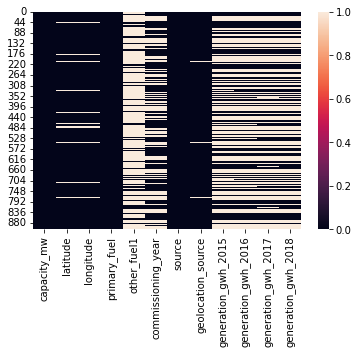

In [7]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

White lines in above plot shows the null values. We will use imputation technique to treat those columns.

In [8]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

#### Treating null values using imputation techniques.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(4)
memory usage: 85.2+ KB


In [7]:
#Latitude is a numerical column and we will use mean method to fill the null values

df["latitude"].fillna(df["latitude"].mean(),inplace=True)

Let's fill other_fuel1 and geolocation_source through mode method as these are object type data.

In [8]:
df["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Columns like longitude, commissioning_year, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 have high skewness. We will use median methos for filling null values.

In [9]:
# Filling null values using their median values
df["longitude"].fillna(df["longitude"].median(),inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].median(),inplace=True)
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median(),inplace=True)
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median(),inplace=True)
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median(),inplace=True)
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median(),inplace=True)


In [12]:
# Checking count of null values if any after imputing.
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

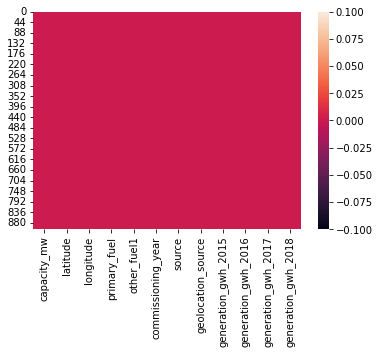

In [13]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

Now Let's separate the Numerical and Catagorical columns

In [10]:
Catg_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [11]:
Num_data = []
for x in df.dtypes.index:
    if df.dtypes[x] !='object':
        Num_data.append(x)
Num_data

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [17]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [19]:
# Checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [20]:
# Checking the uniqueness of primary_fuel
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

## Data Visualisation

#### Univariate Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


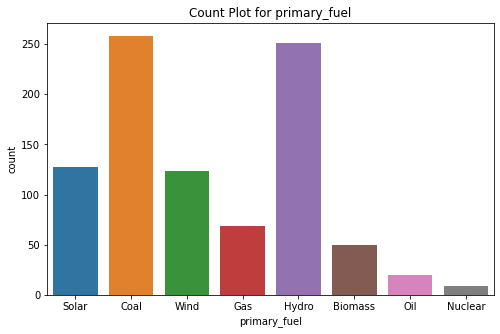

In [21]:
#Checking the count plot of primary_fuel
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["primary_fuel"])
plt.title(f"Count Plot for primary_fuel")
plt.show()

From above count plot we can see that Coal and Hydro is the major source of energy for electricity generation. Nuclear energy is the least used for electricity generation.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


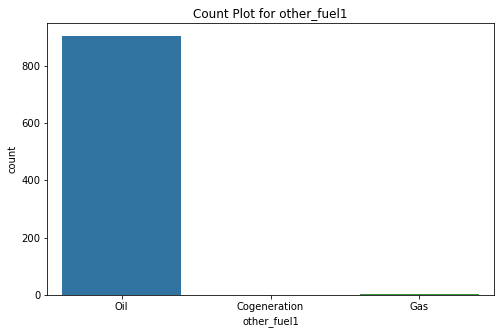

In [22]:
#Checking the count plot of other_fuel1
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["other_fuel1"])
plt.title(f"Count Plot for other_fuel1")
plt.show()

Oil is the mosly used for Other fulel1 catagory while gas is used very little.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


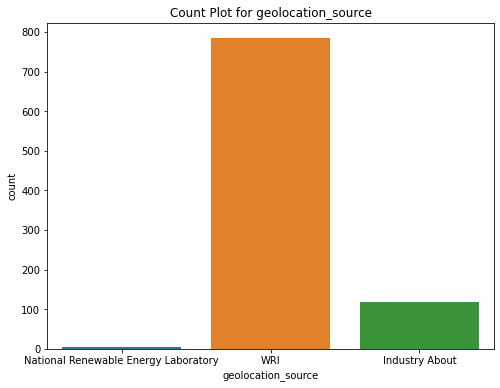

In [24]:
#Checking the count plot of geolocation_source
print(df["geolocation_source"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["geolocation_source"])
plt.title(f"Count Plot for geolocation_source")
plt.show()

From above plot, WRI provide more information about geolocation information than others.

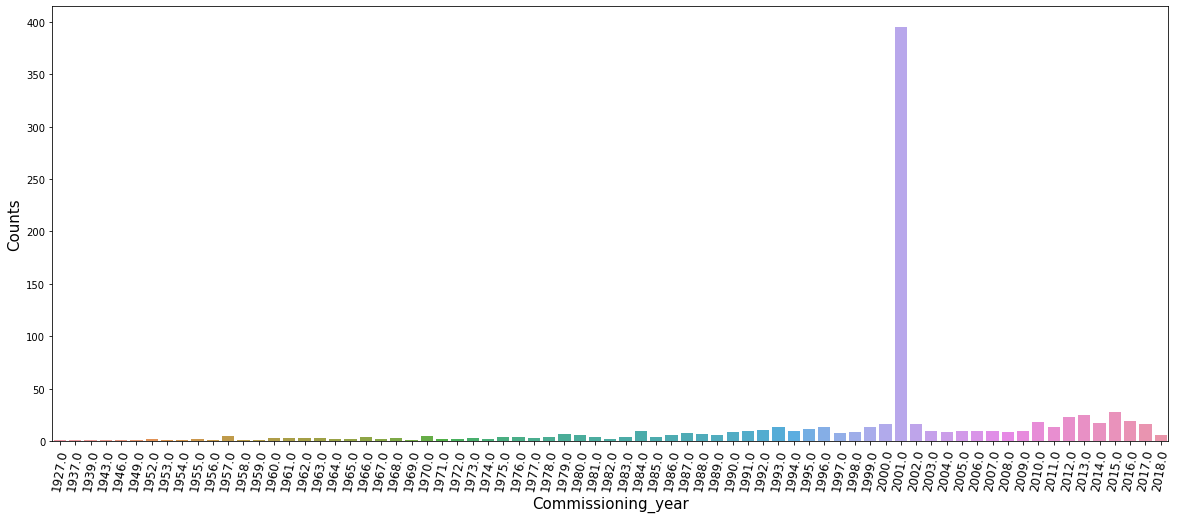

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(df['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

From the above plot we can see that in the Year 2001, highest number of plat is commissioned.

#### Bivariate Analysis

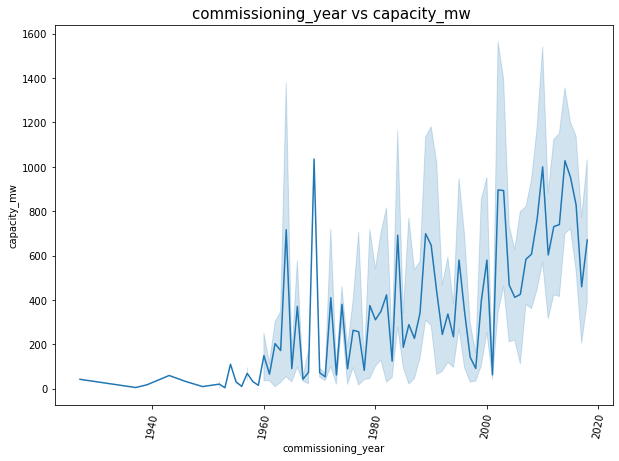

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see that from year 2000, there is a sharp increase in power plant capacity

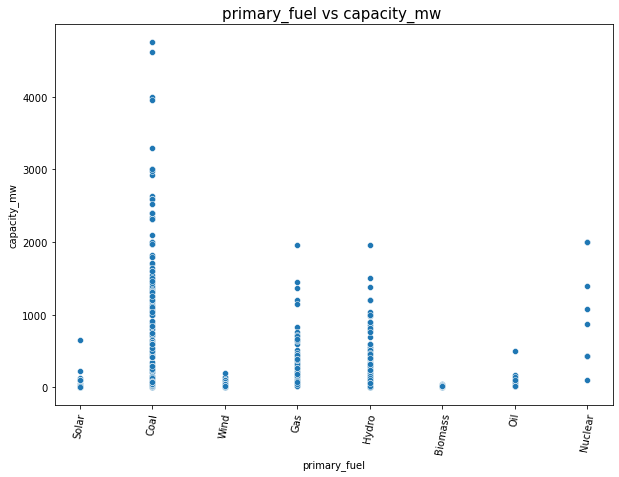

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

From above plot, we can see that coal is used for higher capacity plat followed by Gas, Hydro.

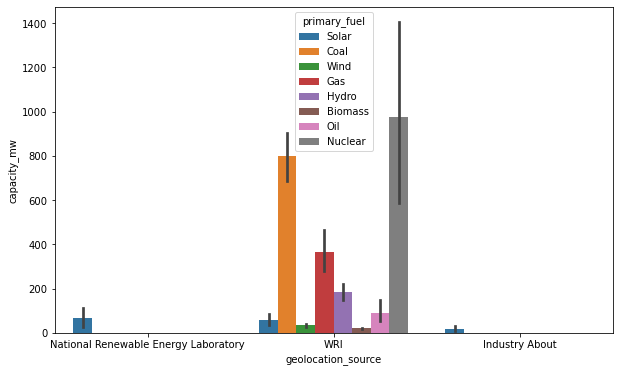

In [31]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df, hue='primary_fuel')
plt.show()

The capacity of geolocation source WRI is maximum. The geolacation source Industry About has less capacity. In WRI all sources of power is used,but coal and Nuclear has maximum usages.

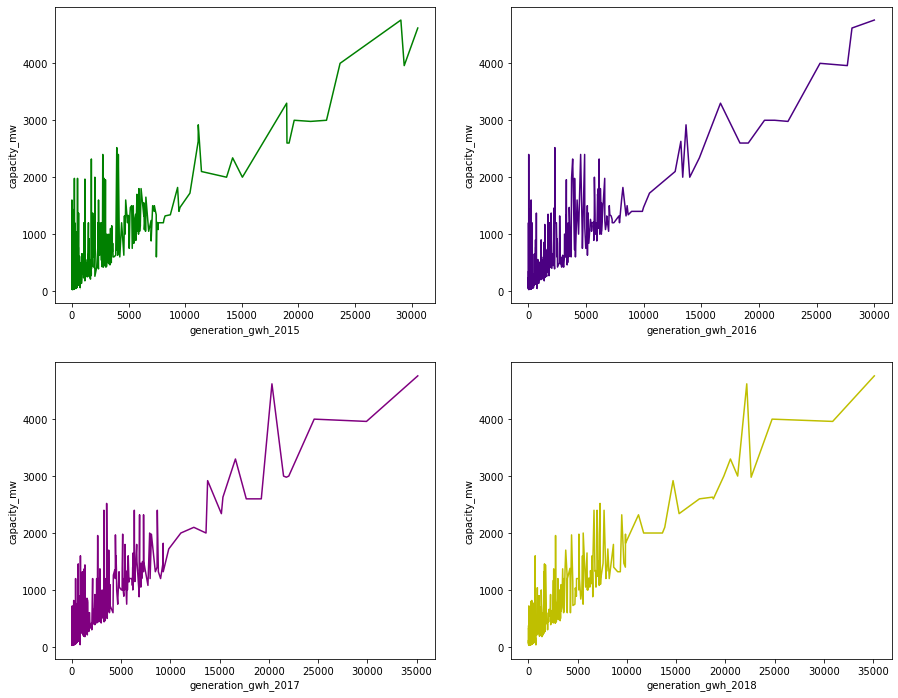

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="g")

sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="purple")

sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="y")
plt.show()

There is a positive linear relationship between the capacity and the electricity generation for the years mentioned.

The plot shows how the electricity generation reported for the years 2015,2016,2017,2018 have high capacity of above 1000mw. Also power generation growth is more than 5000gwh in all the years.

As the electricity generation growth increases, the capacity of plant is also increasing moderately

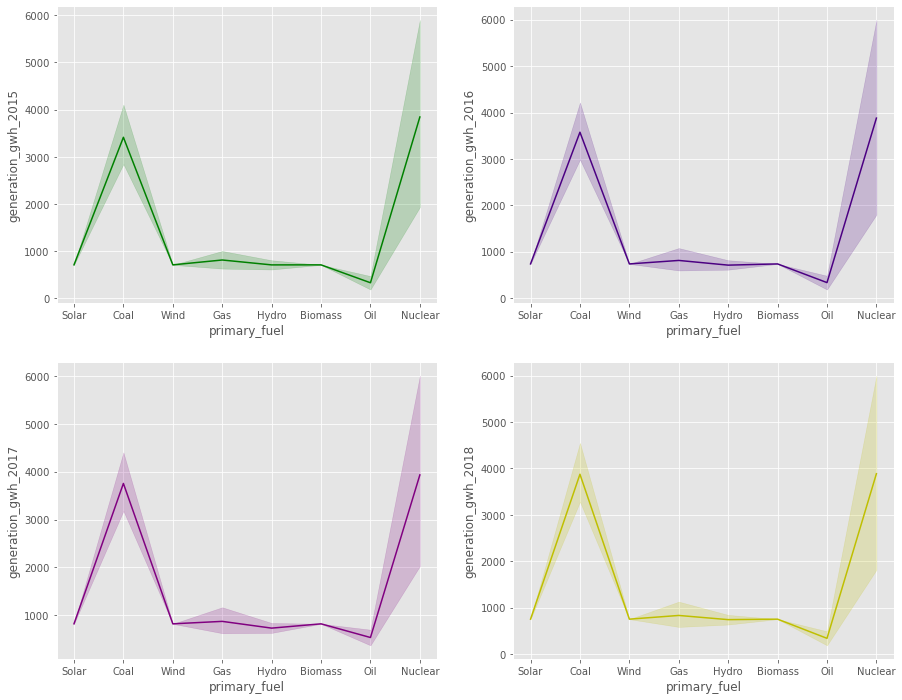

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.lineplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,0],data=df,color="g")

sns.lineplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[0,1],data=df,color="indigo")

sns.lineplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,0],data=df,color="purple")

sns.lineplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[1,1],data=df,color="y")
plt.show()

Though Nuclear has higher electricity generation reports, We can see coal is the primary fuel for power generation.

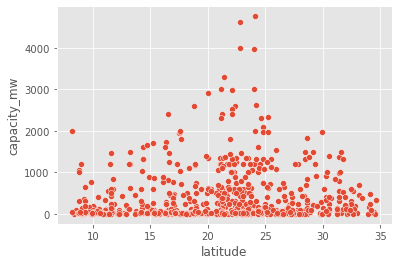

In [34]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

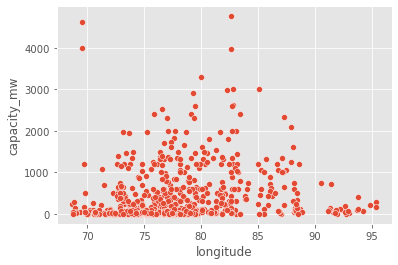

In [35]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest between 75 to 80

#### Multivariate Analysis

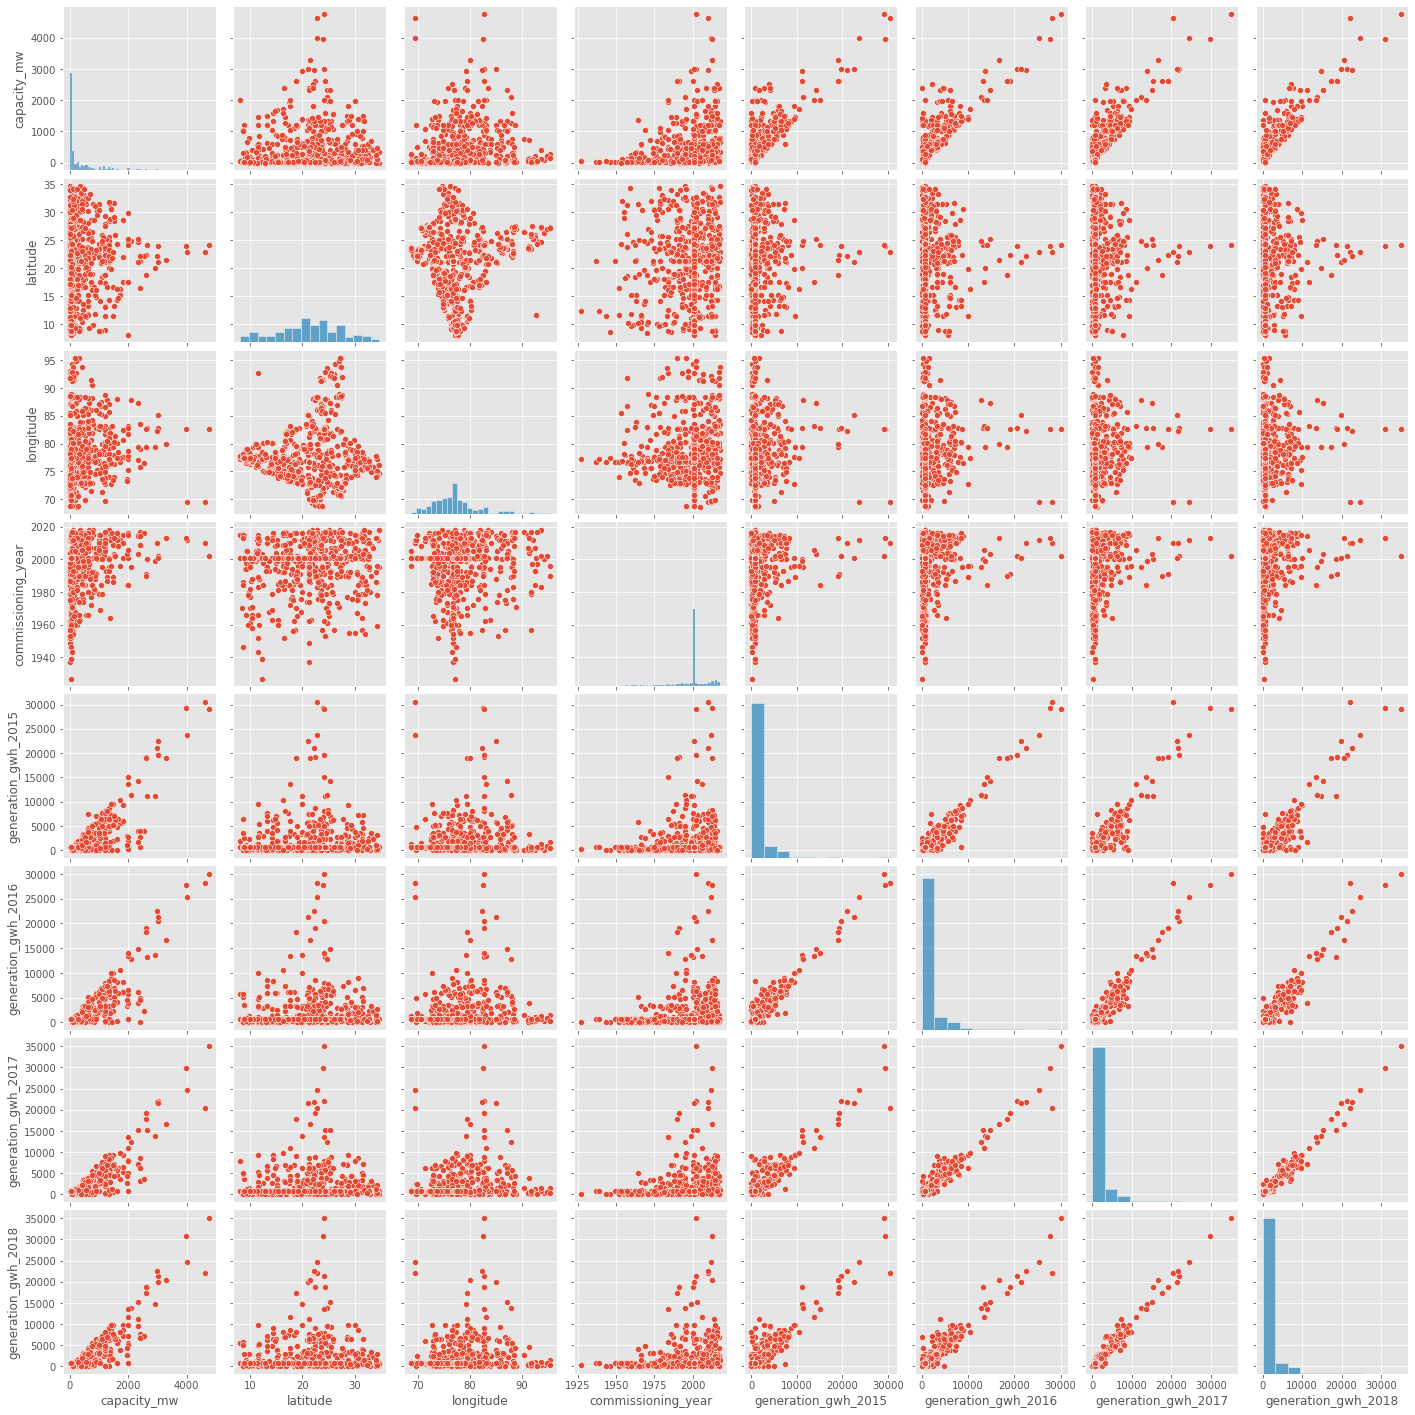

In [42]:
# Checking the pairwise relation between the features.
sns.pairplot(df)

There is a linear relationship between few features. We will check Multicollinearity.

#### Encoding Catagorical Data

In [12]:
Catag_data= ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df[Catag_data]= df[Catag_data].apply(le.fit_transform)
df[Catag_data]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


### Outlier

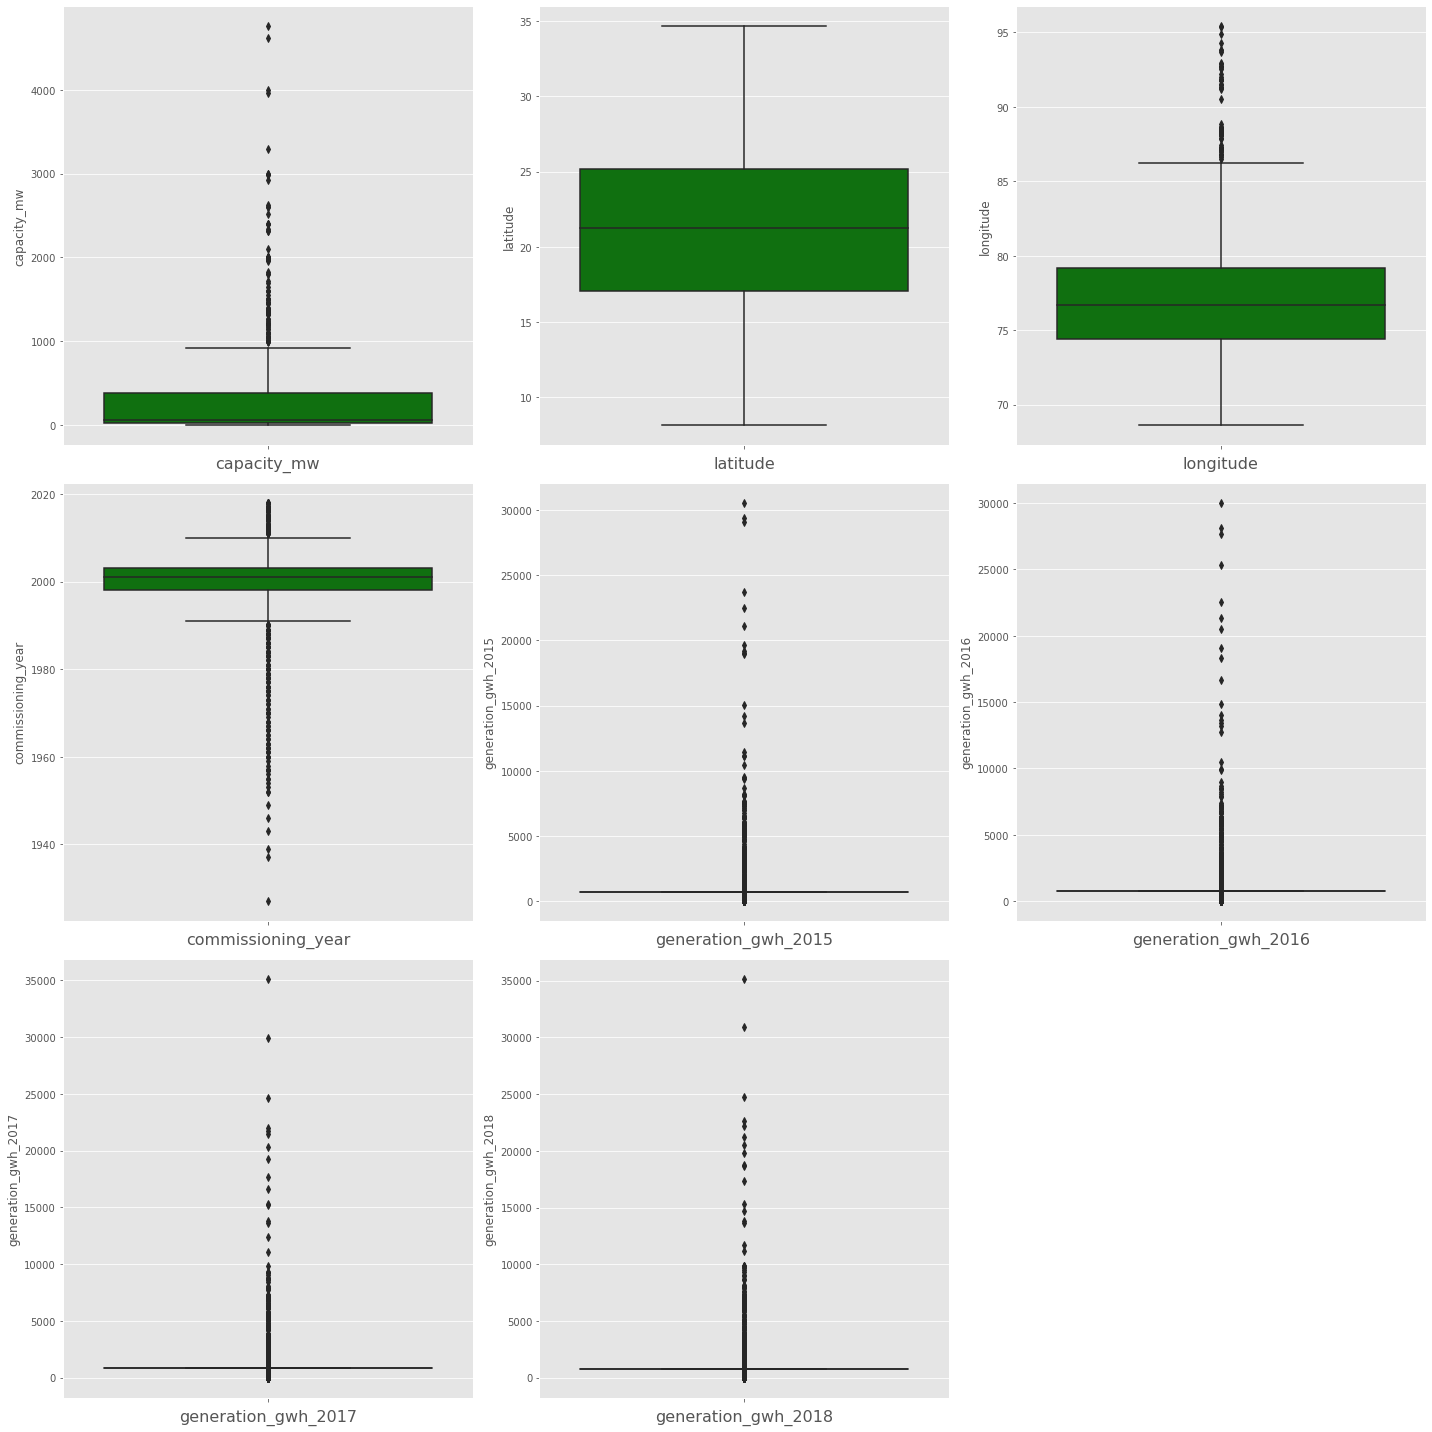

In [48]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in Num_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.tight_layout()

All column has outliers except Latitude

##### Removing outliers using Zscore

In [13]:
#Features having Outliers
df1 = df[['capacity_mw','longitude','commissioning_year','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [14]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,22,2,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2001.0,77,0,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2,2001.0,21,2,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2,2001.0,59,2,711.181225,737.205450,817.977250,751.644375


In [51]:
df.shape

(907, 12)

In [52]:
new_df.shape

(849, 12)

In [53]:
# Let's check the the data loss
data_loss = (907-849)/907*100
data_loss

6.39470782800441

So we are losing only 6% of data,that is feasible and we may proceed with this

In [15]:
df=new_df.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [55]:
# Checking the skewness
df.skew()

capacity_mw             1.977139
latitude               -0.116730
longitude               0.947530
primary_fuel            0.409953
other_fuel1           -19.785804
commissioning_year     -1.285033
source                  1.730516
geolocation_source     -2.062603
generation_gwh_2015     2.841844
generation_gwh_2016     2.756438
generation_gwh_2017     2.629544
generation_gwh_2018     2.667369
dtype: float64

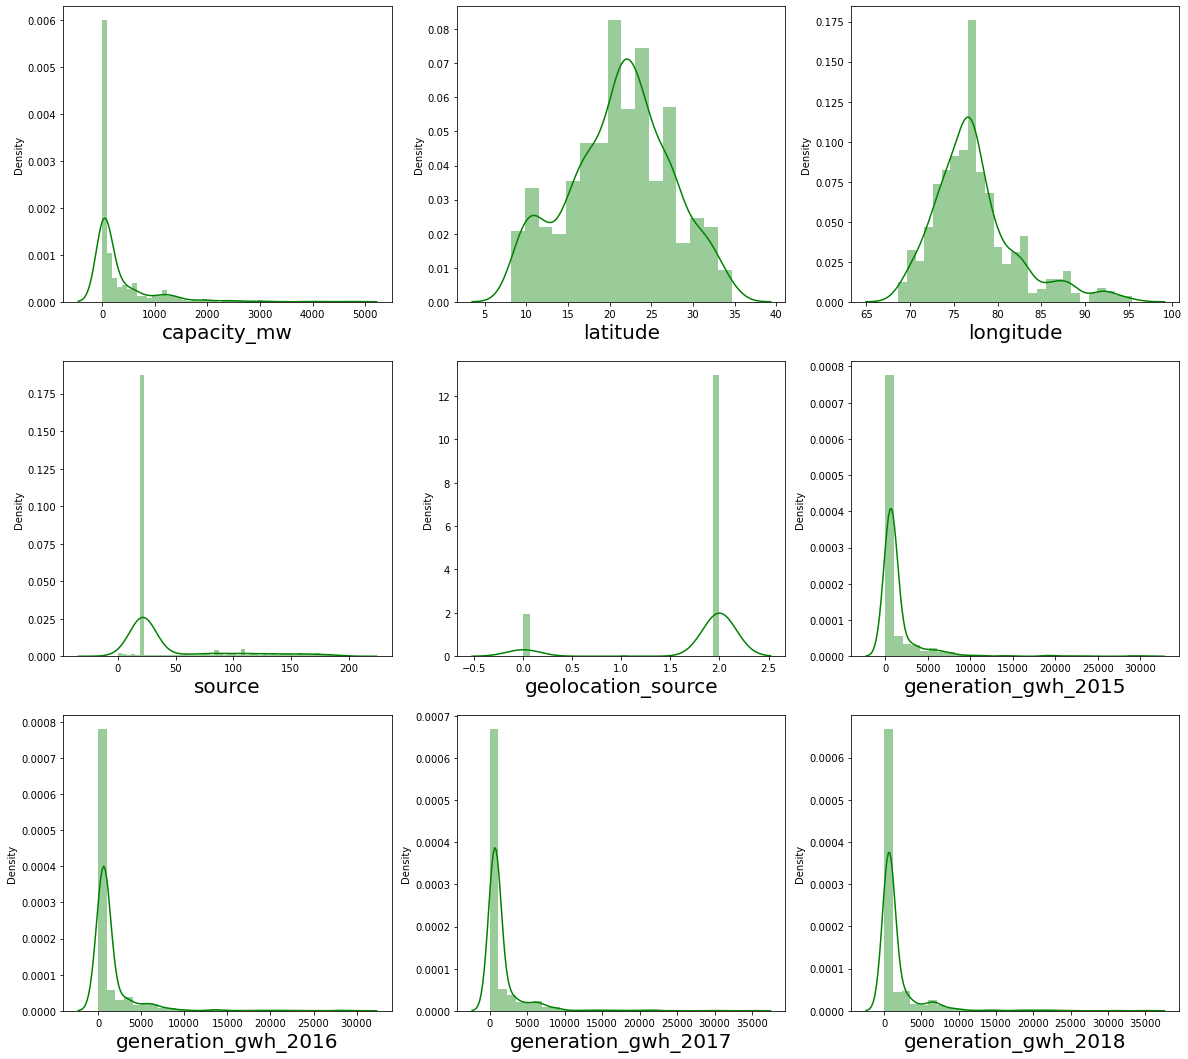

In [15]:
#Checking the skewness through Dist plot
feature=df[["capacity_mw",'latitude','longitude','source','geolocation_source','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in feature:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Data is highly skewed on most of the features.

##### Removing skewness through power transform

In [16]:
# Removing skewness using yeo-johnson method to get better prediction
features=["capacity_mw",'latitude','longitude','source','geolocation_source','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [17]:
df[features] = scaler.fit_transform(df[features].values)
df[features].head()

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,1.159436,-0.944854,1.582861,-2.345400,-0.052449,-0.050215,-0.039359,-0.061174
1,0.193694,0.579032,-0.534212,2.036658,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
2,-0.292337,0.099912,-2.390933,-0.471879,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
3,0.360998,0.428491,2.167755,-0.403248,0.396062,0.072704,0.083178,-0.185637,-0.184018
4,1.649503,0.109302,1.126913,-0.403248,0.396062,1.836146,1.842814,1.621580,1.919439


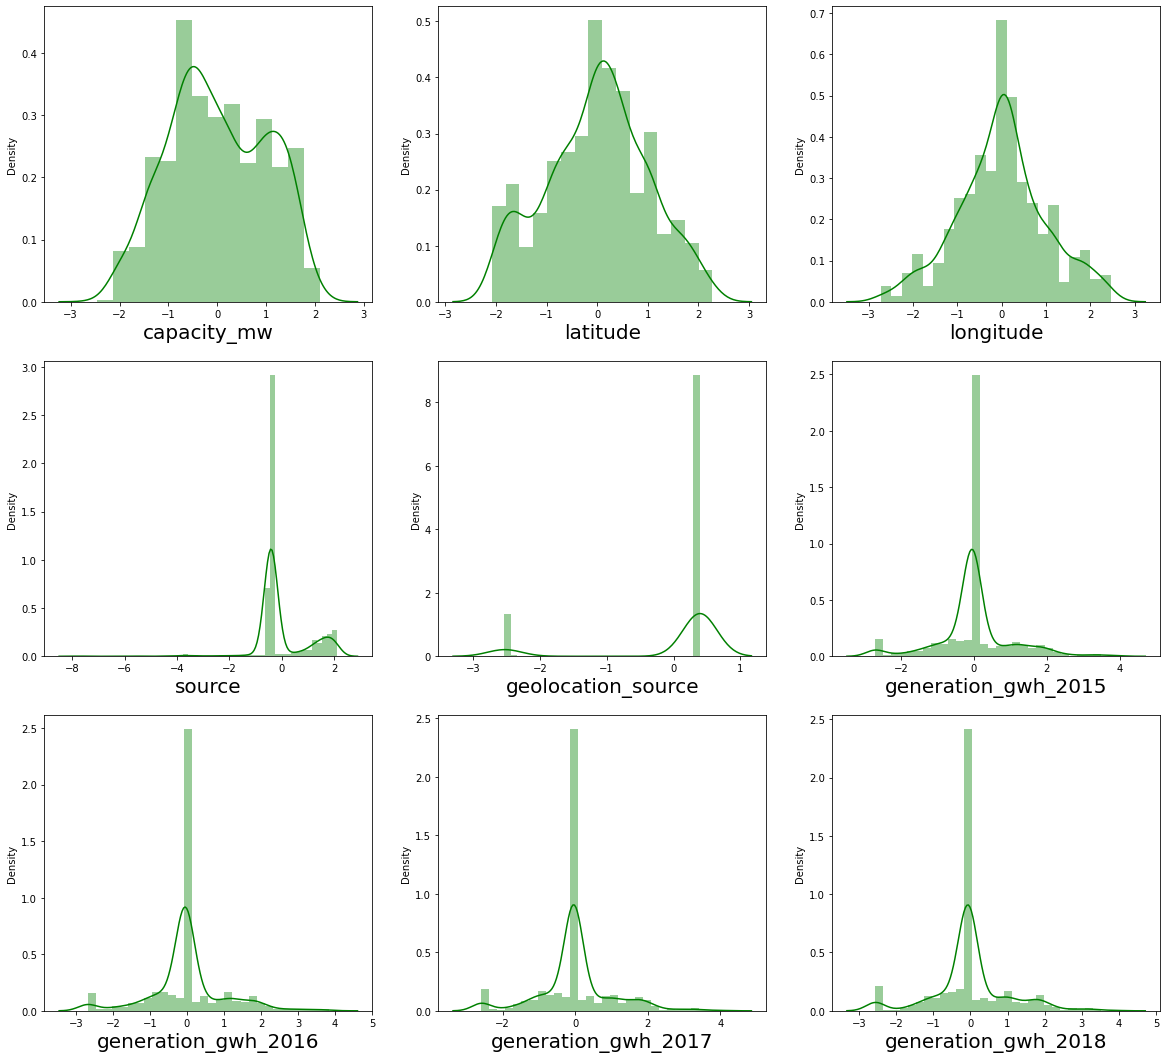

In [18]:
#Checking the skewness through Dist plot after using power transform
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in feature:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [ ]:
Skewness is removed for most features. 

#### Correlation using HEAT map

In [19]:
cor = df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.061031,0.324527,-0.536268,-0.038544,0.159858,-0.325920,0.467576,0.359261,0.380154,0.371111,0.379955
latitude,0.061031,1.000000,-0.033146,-0.007538,0.037304,0.084794,0.043287,-0.187932,0.098227,0.120693,0.101397,0.108452
longitude,0.324527,-0.033146,1.000000,-0.399226,0.028545,0.009542,-0.200784,0.298979,0.042791,0.090351,0.077734,0.094943
primary_fuel,-0.536268,-0.007538,-0.399226,1.000000,0.004912,-0.054885,0.018340,-0.485448,-0.173259,-0.190528,-0.174678,-0.187704
other_fuel1,-0.038544,0.037304,0.028545,0.004912,1.000000,0.043267,0.021897,-0.021507,0.042710,0.058261,0.023582,0.061594
commissioning_year,0.159858,0.084794,0.009542,-0.054885,0.043267,1.000000,0.086124,-0.079201,0.135820,0.197935,0.175737,0.169696
source,-0.325920,0.043287,-0.200784,0.018340,0.021897,0.086124,1.000000,-0.399994,-0.021150,-0.020249,-0.015871,-0.024668
geolocation_source,0.467576,-0.187932,0.298979,-0.485448,-0.021507,-0.079201,-0.399994,1.000000,0.020773,0.019888,0.015588,0.024229
generation_gwh_2015,0.359261,0.098227,0.042791,-0.173259,0.042710,0.135820,-0.021150,0.020773,1.000000,0.896980,0.797633,0.801296
generation_gwh_2016,0.380154,0.120693,0.090351,-0.190528,0.058261,0.197935,-0.020249,0.019888,0.896980,1.000000,0.903437,0.900392


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down

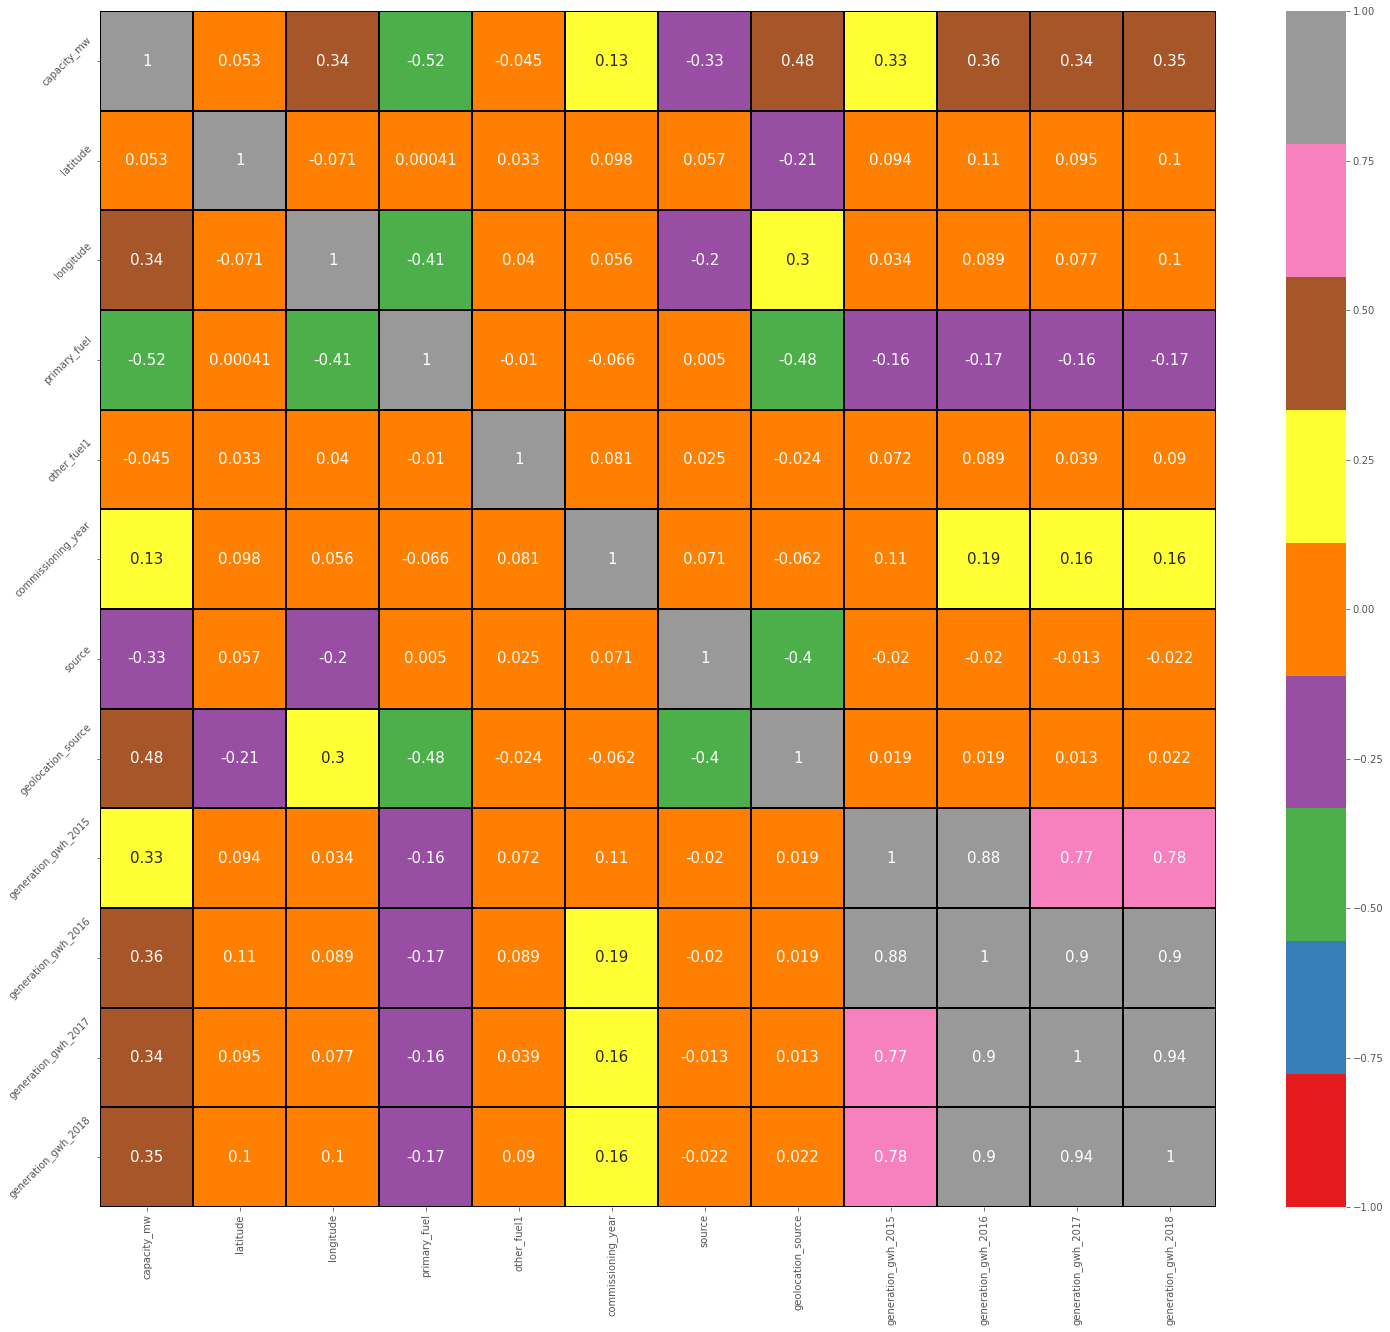

In [66]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")
plt.yticks(rotation=45);

Column capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015. And the capacity_mw is negatively correlated with the features primary_fuel, source and geolocation_source. 
The columns other_fuel1 and latitude have no relation with the capacity_mw, so we can drop them.

Visualizing the correlation between capacity_mw and features using bar plot

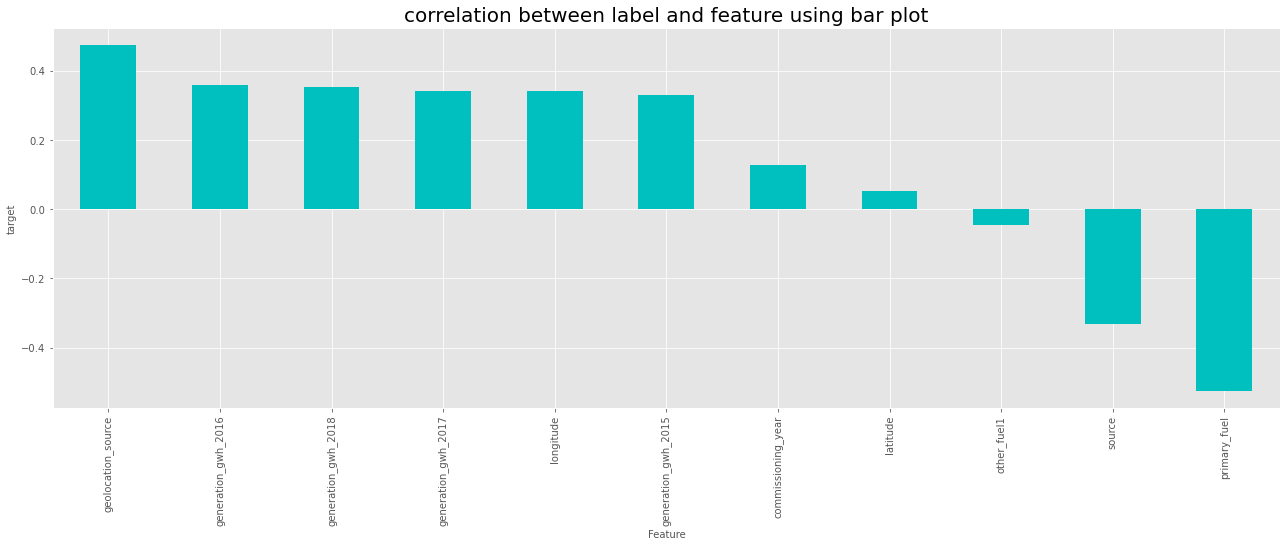

In [67]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

From above bar plot we can see that latitude has very less correlation with target and other_fuel1 negatively correlated. We will drop these two featues.

In [20]:
df.drop('other_fuel1',axis=1,inplace=True)

In [21]:
df.drop('latitude',axis=1,inplace=True)

### Data preprocessing

##### Separating the independent and target variables into x and y

In [70]:
x = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

##### Scaling data with standard scaler

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.920923,1.173145,1.020063,1.525908,-2.236076,-0.046794,-0.046264,-0.031319,-0.052955
1,-0.498776,-0.978043,0.118602,1.979647,0.409608,-0.046794,-0.046264,-0.031319,-0.052955
2,-2.376529,1.603382,0.118602,-0.488871,0.409608,-0.046794,-0.046264,-0.031319,-0.052955
3,2.431474,-0.547805,0.389040,-0.422453,0.409608,0.094237,0.104320,-0.195272,-0.190374
4,1.262908,-0.978043,1.380647,-0.422453,0.409608,2.240067,2.244577,1.973966,2.360470


This is our scaled data using standard scaler.

##### Variance Inflation Factor(VIF)

From Heatmap we have checked multi collinearity issue and drop few column. We will further check the VIF.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif

,Features,VIF Value
0,longitude,1.286745
1,primary_fuel,1.623999
2,commissioning_year,1.070271
3,source,1.300537
4,geolocation_source,1.655157
5,generation_gwh_2015,4.770723
6,generation_gwh_2016,11.071774
7,generation_gwh_2017,9.769451
8,generation_gwh_2018,9.283515


Except generation_gwh_2016, all features having vif value less than 10. So on feature generation_gwh_2016, slightly multicollinearity issue is there but we will ignore this for now.

### Modeling

##### Finding best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [87]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.8450617213050906 on Random_state  61


So, here we are getting the maximum r2 score as 84.50% on the random state 61.

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

#### Applying Regression Algorithms for target capacity_mw

##### Importing all the Regression Algorithms

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [92]:
# Checking R2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error(MAE):',mean_absolute_error(y_test, predLR))
print('Mean squared error(MSE):',mean_squared_error(y_test, predLR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5427359403062189
Mean abs error(MAE): 0.5698133712030238
Mean squared error(MSE): 0.48159567856339724
Root Mean squared error(RMSE): 0.6939709493656037
The CV score  for Linear_regression is : 0.4648062811161247


#### Random Forest Regressor

In [93]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predRFR)))

# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8413607087614974
Mean abs error: 0.30304235556263415
Mean squared error: 0.16708069547820206
Root Mean squared error(RMSE): 0.40875505559956327
The CV  score for  the Random forest regressor is: 0.7739456884878871


#### Decision Tree Regressor

In [94]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predDTR)))

# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.7033408450285485
Mean abs error: 0.4015334385963697
Mean squared error: 0.3124447767362182
Root Mean squared error(RMSE): 0.5589675990039299
The CV score  for  the Decision Tree Regression is : 0.6038623395630125


#### KNN Regressor

In [95]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7420595832249317
Mean abs error: 0.3764933841579742
Mean squared error: 0.27166576382343216
Root Mean squared error(RMSE): 0.5212156596107145
The CV score  for  the KNN regressor is : 0.6832508564618266


#### BaggingRegressor

In [100]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

# Checking cv score for BaggingRegressor
print('The CV score  for  the Bagging regressor is :',cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.833502902413767
MAE: 0.31296506632529725
MSE: 0.17535662598231663
RMSE: 0.41875604590538945
0.7570171747358498
The CV score  for  the Bagging regressor is : 0.7545328563649237


#### Stochastic Gradient Descent Regressor

In [97]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5422043875086666
Mean abs error: 0.5715133723811311
Mean squared error: 0.48215551598075496
Root Mean squared error(RMSE): 0.6943741901746888
The  CV score for the SGD  regressor is : 0.4692895393143832


#### Gradient Boosting Regressor

In [98]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

#prediction
predGBR=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,predGBR))
print('Mean abs error:',mean_absolute_error(y_test, predGBR))
print('Mean squared error:',mean_squared_error(y_test, predGBR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predGBR)))

# Checking cv score for GBR Regression
print('The  CV score for the GradientBoosting  regressor is :',cross_val_score(GBR,x,y,cv=5).mean())

R2_Score: 0.8505859591322176
Mean abs error: 0.29694844061532655
Mean squared error: 0.15736455746556344
Root Mean squared error(RMSE): 0.39669201840415624
The  CV score for the GradientBoosting  regressor is : 0.7890637799929064


From the above observation, looking at the difference of R2 score and the cross validation score we conclude that KNN Regressior is our best fitting model

### Hyperparameter tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
#KNN Regressor
parameters = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [103]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [105]:
GCV.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [107]:
capacity = KNN(metric='manhattan', n_neighbors=11, weights='distance')
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.40875505559956327
R2_Score: 77.66030069223682


After tuning model score has increased to 77.66%

### Saving the Regression model

In [108]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Global_Power_Plant_Capacity_MW.pkl")

['Global_Power_Plant_Capacity_MW.pkl']

##### Let's load the saved model,  get the prediction and plot

In [109]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_Capacity_MW.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1.541764,1.585802
1,1.598041,1.626910
2,-1.006542,-1.322983
3,-0.559124,-0.429812
4,-1.436779,-0.899590
...,...,...
250,-0.234540,-0.710227
251,-0.197043,-0.231057
252,1.046336,-0.973250
253,-0.693818,-0.415601


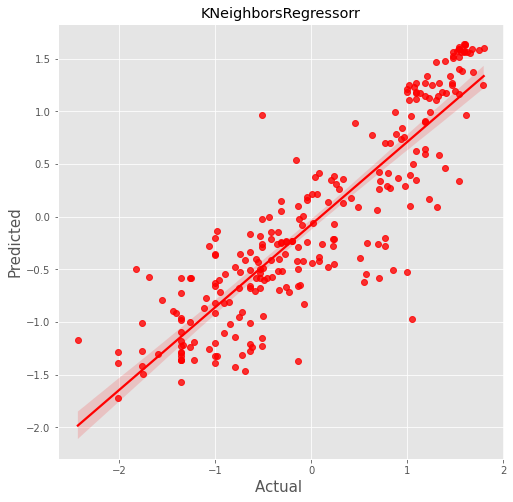

In [110]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("KNeighborsRegressorr")
plt.show()

## Prediction of Primary Fuel based on Classification

In [22]:
df.head()

,capacity_mw,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,-0.944854,6,2011.0,1.582861,-2.345400,-0.052449,-0.050215,-0.039359,-0.061174
1,0.193694,-0.534212,1,2001.0,2.036658,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
2,-0.292337,-2.390933,7,2001.0,-0.471879,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
3,0.360998,2.167755,2,2004.0,-0.403248,0.396062,0.072704,0.083178,-0.185637,-0.184018
4,1.649503,1.126913,1,2015.0,-0.403248,0.396062,1.836146,1.842814,1.621580,1.919439


This is our dataset after removing skewness.

In [23]:
df_cl=df.copy() #Changing the name of dataframe to separate it from previous cases

In [24]:
#checking the correlation
df_cl.corr()

,capacity_mw,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.324527,-0.536268,0.159858,-0.325920,0.467576,0.359261,0.380154,0.371111,0.379955
longitude,0.324527,1.000000,-0.399226,0.009542,-0.200784,0.298979,0.042791,0.090351,0.077734,0.094943
primary_fuel,-0.536268,-0.399226,1.000000,-0.054885,0.018340,-0.485448,-0.173259,-0.190528,-0.174678,-0.187704
commissioning_year,0.159858,0.009542,-0.054885,1.000000,0.086124,-0.079201,0.135820,0.197935,0.175737,0.169696
source,-0.325920,-0.200784,0.018340,0.086124,1.000000,-0.399994,-0.021150,-0.020249,-0.015871,-0.024668
geolocation_source,0.467576,0.298979,-0.485448,-0.079201,-0.399994,1.000000,0.020773,0.019888,0.015588,0.024229
generation_gwh_2015,0.359261,0.042791,-0.173259,0.135820,-0.021150,0.020773,1.000000,0.896980,0.797633,0.801296
generation_gwh_2016,0.380154,0.090351,-0.190528,0.197935,-0.020249,0.019888,0.896980,1.000000,0.903437,0.900392
generation_gwh_2017,0.371111,0.077734,-0.174678,0.175737,-0.015871,0.015588,0.797633,0.903437,1.000000,0.938127
generation_gwh_2018,0.379955,0.094943,-0.187704,0.169696,-0.024668,0.024229,0.801296,0.900392,0.938127,1.000000


Our data is both positively and negatively correlated.

<AxesSubplot:>

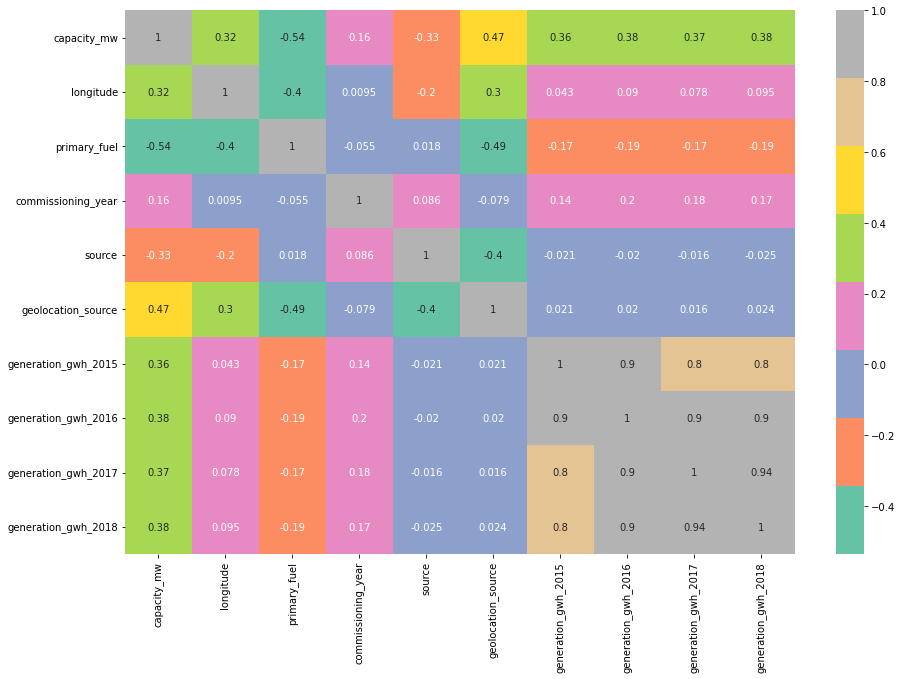

In [25]:
# Let's see through heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_cl.corr(), annot = True, linecolor="b",cmap="Set2")

We have seen coorelation in previous cases. Now we will plot corelation with our label primary_fuel

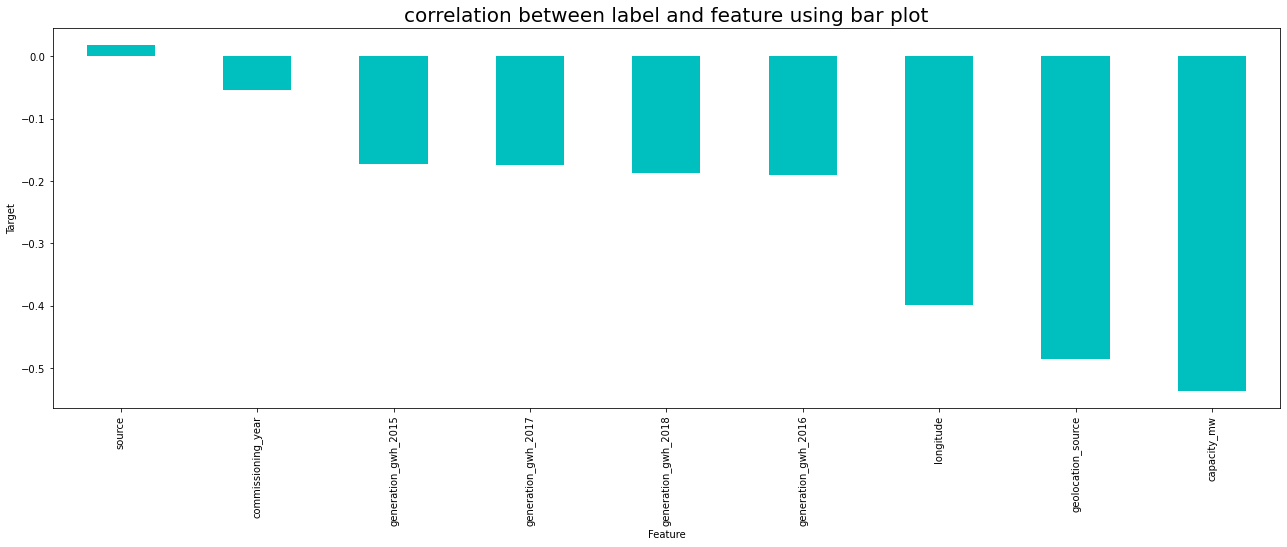

In [26]:
plt.figure(figsize=(22,7))
df_cl.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

All features are negatively correlated with lael. Feature source has no relation with label, so we will drop this feature.

In [27]:
df_cl.drop(columns='source',axis=1,inplace=True)

In [28]:
df_cl.head()

,capacity_mw,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,-0.944854,6,2011.0,-2.345400,-0.052449,-0.050215,-0.039359,-0.061174
1,0.193694,-0.534212,1,2001.0,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
2,-0.292337,-2.390933,7,2001.0,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
3,0.360998,2.167755,2,2004.0,0.396062,0.072704,0.083178,-0.185637,-0.184018
4,1.649503,1.126913,1,2015.0,0.396062,1.836146,1.842814,1.621580,1.919439


##### Separating the independent and target variable into x and y

In [29]:
x_cl = df_cl.drop('primary_fuel', axis=1)
y_cl = df_cl['primary_fuel']

Scaling data with Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_cl = pd.DataFrame(scaler.fit_transform(x_cl), columns=x_cl.columns)
x_cl.head()

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,-0.944855,0.933076,-2.345400,-0.052449,-0.050215,-0.039359,-0.061174
1,0.193694,-0.534213,0.172699,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
2,-0.292337,-2.390933,0.172699,0.396062,-0.052449,-0.050215,-0.039359,-0.061174
3,0.360998,2.167755,0.400812,0.396062,0.072704,0.083178,-0.185637,-0.184018
4,1.649503,1.126913,1.237227,0.396062,1.836146,1.842814,1.621580,1.919439


#### VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x_cl.columns
vif["VIF Value"]=[variance_inflation_factor(x_cl.values, i)for i in range(len(x_cl.columns))]
vif

,Features,VIF Value
0,capacity_mw,1.691565
1,longitude,1.169877
2,commissioning_year,1.089132
3,geolocation_source,1.404069
4,generation_gwh_2015,5.278749
5,generation_gwh_2016,11.174274
6,generation_gwh_2017,9.905222
7,generation_gwh_2018,9.608470


We  can ignore the vif value of more than 10 for feature generation_gwh_2016

In [32]:
# let us check the Label count
y_cl.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

From our Label data count, it is not equally distributed, so we need to use sampling method.

#### Oversampling

In [33]:
# Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_cl, y_cl = SM.fit_resample(x_cl,y_cl)
y_cl.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

Data is now balanced equally

## Modeling

##### Finding best random state

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(x_cl,y_cl,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8527131782945736  on Random_state  168


Here we are getting accuracy score of 85.27% with Random state 168

Now splitting the data for Training and Testing purpose. 75% we are considering for Training and 25% for Testing purpose

In [36]:
clx_train,clx_test,cly_train,cly_test = train_test_split(x_cl,y_cl,test_size=.25, random_state =maxRS)

#### Logistic Regression

In [37]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(clx_train,cly_train)

# Prediction
predLR = LR.predict(clx_test)

print(accuracy_score(cly_test, predLR))
print(confusion_matrix(cly_test, predLR))
print(classification_report(cly_test,predLR))

0.5581395348837209
[[35  0  0  0  0  0  0 24]
 [ 8 25  5  4  9  3  0  5]
 [ 0 14 22  6 12  2  0  9]
 [11  7  5 25  7  1  0  3]
 [ 0  7  0  5 59  2  0  0]
 [ 0  0  1  3  0 39  0 28]
 [ 0  0  0  0  0  0 63  0]
 [32  0 10  1  0  4  0 20]]
              precision    recall  f1-score   support

           0       0.41      0.59      0.48        59
           1       0.47      0.42      0.45        59
           2       0.51      0.34      0.41        65
           3       0.57      0.42      0.49        59
           4       0.68      0.81      0.74        73
           5       0.76      0.55      0.64        71
           6       1.00      1.00      1.00        63
           7       0.22      0.30      0.26        67

    accuracy                           0.56       516
   macro avg       0.58      0.55      0.56       516
weighted avg       0.58      0.56      0.56       516



#### KNeighbors Classifier

In [38]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(clx_train,cly_train)

# Prediction
predknn = knn.predict(clx_test)

print(accuracy_score(cly_test, predknn))
print(confusion_matrix(cly_test, predknn))
print(classification_report(cly_test,predknn))

0.8449612403100775
[[55  1  1  0  0  1  0  1]
 [ 6 34  6  2  3  1  0  7]
 [ 0  2 54  1  2  3  0  3]
 [ 1  2 11 43  0  0  0  2]
 [ 0  2  2  1 68  0  0  0]
 [ 0  3  3  0  1 62  0  2]
 [ 0  0  0  0  0  0 63  0]
 [ 8  1  1  0  0  0  0 57]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        59
           1       0.76      0.58      0.65        59
           2       0.69      0.83      0.76        65
           3       0.91      0.73      0.81        59
           4       0.92      0.93      0.93        73
           5       0.93      0.87      0.90        71
           6       1.00      1.00      1.00        63
           7       0.79      0.85      0.82        67

    accuracy                           0.84       516
   macro avg       0.85      0.84      0.84       516
weighted avg       0.85      0.84      0.84       516



#### Decision Tree Classifier

In [39]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)

#Prediction
predDTC = DTC.predict(clx_test)

print(accuracy_score(cly_test, predDTC))
print(confusion_matrix(cly_test, predDTC))
print(classification_report(cly_test,predDTC))

0.8546511627906976
[[47  5  0  0  0  0  0  7]
 [ 3 37  4  8  3  1  0  3]
 [ 0  3 59  2  0  1  0  0]
 [ 0  1  7 45  4  2  0  0]
 [ 0  2  0  3 68  0  0  0]
 [ 0  2  3  0  0 65  0  1]
 [ 0  0  0  0  0  0 63  0]
 [ 3  3  2  1  0  1  0 57]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        59
           1       0.70      0.63      0.66        59
           2       0.79      0.91      0.84        65
           3       0.76      0.76      0.76        59
           4       0.91      0.93      0.92        73
           5       0.93      0.92      0.92        71
           6       1.00      1.00      1.00        63
           7       0.84      0.85      0.84        67

    accuracy                           0.85       516
   macro avg       0.85      0.85      0.85       516
weighted avg       0.85      0.85      0.85       516



#### Random Forest Classifier

In [40]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

# Prediction
predRFC = RFC.predict(clx_test)

print(accuracy_score(cly_test, predRFC))
print(confusion_matrix(cly_test, predRFC))
print(classification_report(cly_test,predRFC))

0.8856589147286822
[[53  2  0  0  0  0  0  4]
 [ 3 36  4  4  4  1  0  7]
 [ 0  1 59  1  1  1  0  2]
 [ 0  2  5 49  1  2  0  0]
 [ 0  0  0  1 70  2  0  0]
 [ 0  1  1  0  0 67  0  2]
 [ 0  0  0  0  0  0 63  0]
 [ 2  3  1  1  0  0  0 60]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        59
           1       0.80      0.61      0.69        59
           2       0.84      0.91      0.87        65
           3       0.88      0.83      0.85        59
           4       0.92      0.96      0.94        73
           5       0.92      0.94      0.93        71
           6       1.00      1.00      1.00        63
           7       0.80      0.90      0.85        67

    accuracy                           0.89       516
   macro avg       0.88      0.88      0.88       516
weighted avg       0.88      0.89      0.88       516



#### Bagging Classifier

In [52]:
# Checking accuracy score for Bagging Classifier
BC= BaggingClassifier()
BC.fit(clx_train,cly_train)

# Prediction
predBC = BC.predict(clx_test)

print(accuracy_score(cly_test, predBC))
print(confusion_matrix(cly_test, predBC))
print(classification_report(cly_test,predBC))

0.8643410852713178
[[53  1  1  0  0  1  0  3]
 [ 4 35  3  8  2  1  0  6]
 [ 0  5 53  2  3  2  0  0]
 [ 0  4  6 45  2  2  0  0]
 [ 0  1  0  0 72  0  0  0]
 [ 0  2  1  0  0 67  0  1]
 [ 0  0  0  0  0  0 63  0]
 [ 3  4  1  1  0  0  0 58]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        59
           1       0.67      0.59      0.63        59
           2       0.82      0.82      0.82        65
           3       0.80      0.76      0.78        59
           4       0.91      0.99      0.95        73
           5       0.92      0.94      0.93        71
           6       1.00      1.00      1.00        63
           7       0.85      0.87      0.86        67

    accuracy                           0.86       516
   macro avg       0.86      0.86      0.86       516
weighted avg       0.86      0.86      0.86       516



#### Gradient Boosting Classifier

In [42]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(clx_train,cly_train)

# Prediction
predGB = GB.predict(clx_test)

print(accuracy_score(cly_test, predGB))
print(confusion_matrix(cly_test, predGB))
print(classification_report(cly_test,predGB))

0.8527131782945736
[[54  0  0  0  0  0  0  5]
 [ 5 36  4  4  1  1  0  8]
 [ 0  1 55  2  3  2  0  2]
 [ 0  6  5 45  1  2  0  0]
 [ 0  1  0  5 65  2  0  0]
 [ 0  2  1  0  0 66  0  2]
 [ 0  0  0  0  0  0 63  0]
 [ 8  2  1  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        59
           1       0.75      0.61      0.67        59
           2       0.83      0.85      0.84        65
           3       0.80      0.76      0.78        59
           4       0.93      0.89      0.91        73
           5       0.90      0.93      0.92        71
           6       1.00      1.00      1.00        63
           7       0.77      0.84      0.80        67

    accuracy                           0.85       516
   macro avg       0.85      0.85      0.85       516
weighted avg       0.85      0.85      0.85       516



#### AdaBoost Classifier

In [43]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(clx_train,cly_train)

# Prediction
predABC = ABC.predict(clx_test)

print(accuracy_score(cly_test, predABC))
print(confusion_matrix(cly_test, predABC))
print(classification_report(cly_test,predABC))

0.26356589147286824
[[59  0  0  0  0  0  0  0]
 [44 15  0  0  0  0  0  0]
 [62  3  0  0  0  0  0  0]
 [55  4  0  0  0  0  0  0]
 [68  5  0  0  0  0  0  0]
 [71  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 62  0]
 [67  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.14      1.00      0.24        59
           1       0.54      0.25      0.34        59
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        73
           5       0.00      0.00      0.00        71
           6       1.00      0.98      0.99        63
           7       0.00      0.00      0.00        67

    accuracy                           0.26       516
   macro avg       0.21      0.28      0.20       516
weighted avg       0.20      0.26      0.19       516



#### Checking the cross validation score

In [44]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x_cl,y_cl,cv=5).mean())


0.5649310044899973


In [45]:
# cv score for KNN Classifier
print(cross_val_score(knn,x_cl,y_cl,cv=5).mean())

0.8304285479207316


In [46]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x_cl,y_cl,cv=5).mean())

0.8212240532217494


In [47]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x_cl,y_cl,cv=5).mean())

0.8667563882554832


In [53]:
# cv score for Bagging  Classifier
print(cross_val_score(BC,x_cl,y_cl,cv=5).mean())

0.8483615035614378


In [49]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_cl,y_cl,cv=5).mean())

0.8643374315334164


In [50]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x_cl,y_cl,cv=5).mean())

0.27664848727050473


From the above observation, looking at the difference of Accuracy score and the cross validation score we conclude that KNN Classifier is our best fitting model

### Hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [61]:
#KNN Classifier
parameters = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'leaf_size':[10,100],
              'algorithm':['auto','ball_tree','kd_tree','brute']}

In [62]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [63]:
GCV.fit(clx_train,cly_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [64]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}

In [66]:
Primary_Fuel = KNN(algorithm='auto', leaf_size=10, n_neighbors=2, weights='distance')

Primary_Fuel.fit(clx_train, cly_train)
pred = Primary_Fuel.predict(clx_test)
acc=accuracy_score(cly_test,pred)
print(acc*100)

86.62790697674419


After tuning model accuracy increased to 86.62%

### Saving the Classification model

In [68]:
# Saving the model using .pkl
import joblib
joblib.dump(Primary_Fuel,"Global_Power_Plant_Primary_Fuel.pkl")

['Global_Power_Plant_Primary_Fuel.pkl']

##### Let's Load the Saved model, get the prediction and Plot

In [69]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_Primary_Fuel.pkl")

#Prediction
prediction = model.predict(clx_test)
prediction

array([5, 1, 2, 0, 4, 0, 7, 4, 6, 7, 5, 5, 6, 4, 1, 4, 7, 4, 5, 4, 5, 2,
       2, 2, 4, 6, 2, 3, 1, 5, 7, 7, 1, 1, 5, 1, 2, 5, 6, 0, 1, 5, 7, 7,
       7, 6, 0, 5, 4, 0, 7, 6, 1, 0, 7, 2, 7, 7, 6, 2, 5, 3, 6, 4, 0, 0,
       2, 2, 7, 2, 4, 5, 5, 7, 5, 6, 0, 5, 3, 7, 0, 3, 3, 2, 4, 6, 1, 1,
       6, 6, 0, 2, 4, 0, 7, 7, 6, 1, 4, 4, 1, 0, 4, 4, 4, 6, 7, 7, 6, 5,
       2, 0, 7, 0, 4, 3, 7, 4, 1, 2, 1, 5, 5, 2, 2, 5, 5, 6, 2, 0, 4, 4,
       6, 6, 4, 4, 1, 4, 5, 4, 1, 3, 3, 7, 5, 7, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 5, 4, 3, 7, 2, 6, 2, 7, 4, 2, 5, 3, 1, 5, 7, 0, 6, 2, 6, 2, 6,
       0, 4, 0, 1, 4, 5, 4, 2, 1, 5, 6, 4, 4, 7, 3, 0, 3, 1, 3, 5, 2, 4,
       5, 1, 4, 2, 1, 6, 1, 4, 7, 4, 5, 2, 2, 2, 5, 6, 6, 7, 1, 0, 7, 7,
       6, 7, 2, 4, 0, 1, 2, 5, 5, 4, 2, 6, 5, 6, 3, 0, 3, 7, 6, 3, 2, 7,
       3, 6, 5, 2, 5, 5, 6, 2, 4, 7, 2, 1, 0, 2, 7, 0, 2, 0, 7, 5, 3, 7,
       0, 2, 6, 5, 4, 0, 4, 5, 6, 4, 7, 0, 5, 2, 1, 7, 5, 0, 3, 4, 7, 7,
       0, 3, 0, 1, 7, 4, 6, 7, 2, 5, 7, 0, 5, 3, 6,

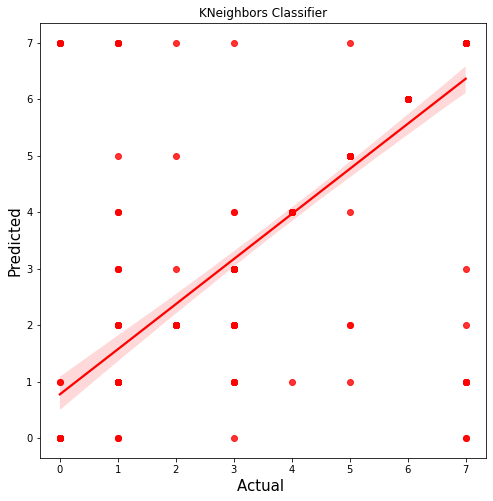

In [70]:
plt.figure(figsize=(8,8))
sns.regplot(cly_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("KNeighbors Classifier")
plt.show()

# Conclusion

Prediction of capacity_mw of the power plant using Regression algorithms is 77.66%.

Prediction of Primary Fuel of the power plant using Classification algorithms is 86.62%.